<a href="https://colab.research.google.com/github/asimmanna17/a/blob/master/compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train.shape, y_train.shape)

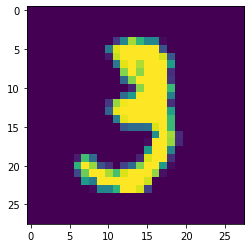

In [ ]:
#print(x_train[5])
plt.imshow(x_train[10])

In [ ]:
y_train[10]

3

In [ ]:
print(x_train.shape)

x_train=x_train.reshape(60000, 28, 28, 1)
x_train=x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test=x_test/255.0

print(x_train.shape)
y_train.shape


(60000, 28, 28)
(60000, 28, 28, 1)


(60000,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
import time 
s=time.time()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=1,epochs=1,validation_data=(x_test,y_test))
print(str(time.time()-s)+'sec')

60000/60000 [==============================] - 243s 4ms/step - loss: 0.1186 - accuracy: 0.9642 - val_loss: 0.0779 - val_accuracy: 0.9746
243.87332963943481sec


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
import time 
s=time.time()
model1=linear_model.LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(str(time.time()-s)+'sec')


0.9258
37.61904168128967sec


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
import time

models = []
#models.append(('LR',LinearRegression()))
models.append(('LOR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
s=time.time()
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f ' % (name, cv_results.mean()))


LOR: 0.915550 
